#

In [77]:
import pandas as pd

In [78]:
pd.set_option('display.max_columns', None)

In [79]:
df1 = pd.read_csv('hps_04_00_02_puf.csv')
df1.head()

In [80]:
df1['EST_ST'] = df1['EST_ST'].astype(str).str.pad(2, side='left', fillchar='0')

In [81]:
# Filter the dataset to include only records with TWDAYS values 1, 2, or 3
filtered_data = df1[df1['TWDAYS_RESP'].isin([1, 2, 3])]

# Basic EDA on the filtered dataset
# Count of records by state
state_distribution = filtered_data['EST_ST'].value_counts()
msa_distribution = filtered_data['EST_MSA'].value_counts()
# Summary statistics for telework days
telework_days_summary = filtered_data['TWDAYS_RESP'].describe()

In [82]:
print(state_distribution)

EST_ST
06    1485
53     842
48     841
51     596
25     587
08     572
24     561
42     496
12     482
41     459
11     449
13     449
04     448
17     424
36     423
26     413
27     392
49     373
34     340
37     323
09     306
55     303
29     278
39     261
18     250
47     248
33     210
19     203
35     202
20     202
21     192
45     185
16     177
40     164
50     160
31     155
44     150
32     145
01     140
02     138
23     138
05     137
10     128
30     118
15     107
22     103
46     101
28      83
54      80
38      71
56      49
Name: count, dtype: int64

In [83]:
print(msa_distribution)

EST_MSA
47900.0    1125
42660.0     628
41860.0     586
35620.0     537
14460.0     522
37980.0     441
31080.0     404
16980.0     388
19100.0     386
12060.0     370
38060.0     350
26420.0     256
19820.0     234
33100.0     194
40140.0     176
Name: count, dtype: int64

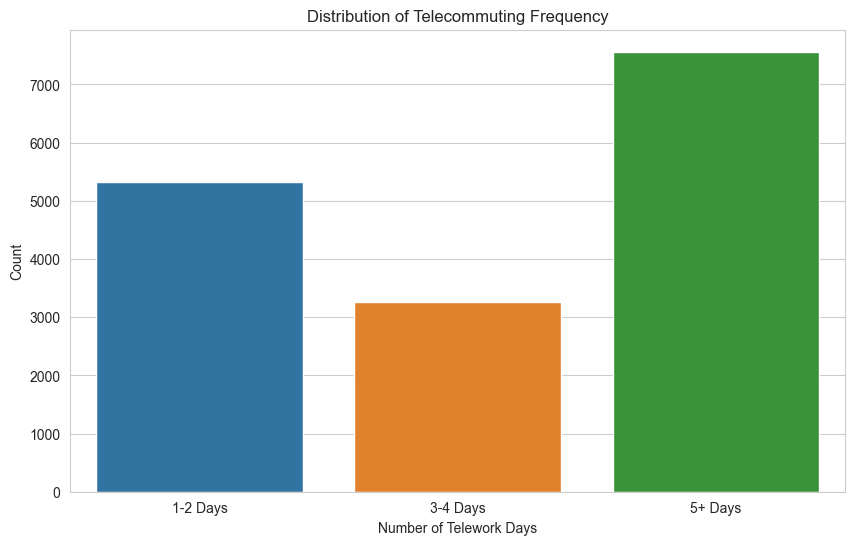

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Telecommuting Frequency Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='TWDAYS_RESP', data=filtered_data)
plt.title('Distribution of Telecommuting Frequency')
plt.xlabel('Number of Telework Days')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1-2 Days', '3-4 Days', '5+ Days'])
plt.show()

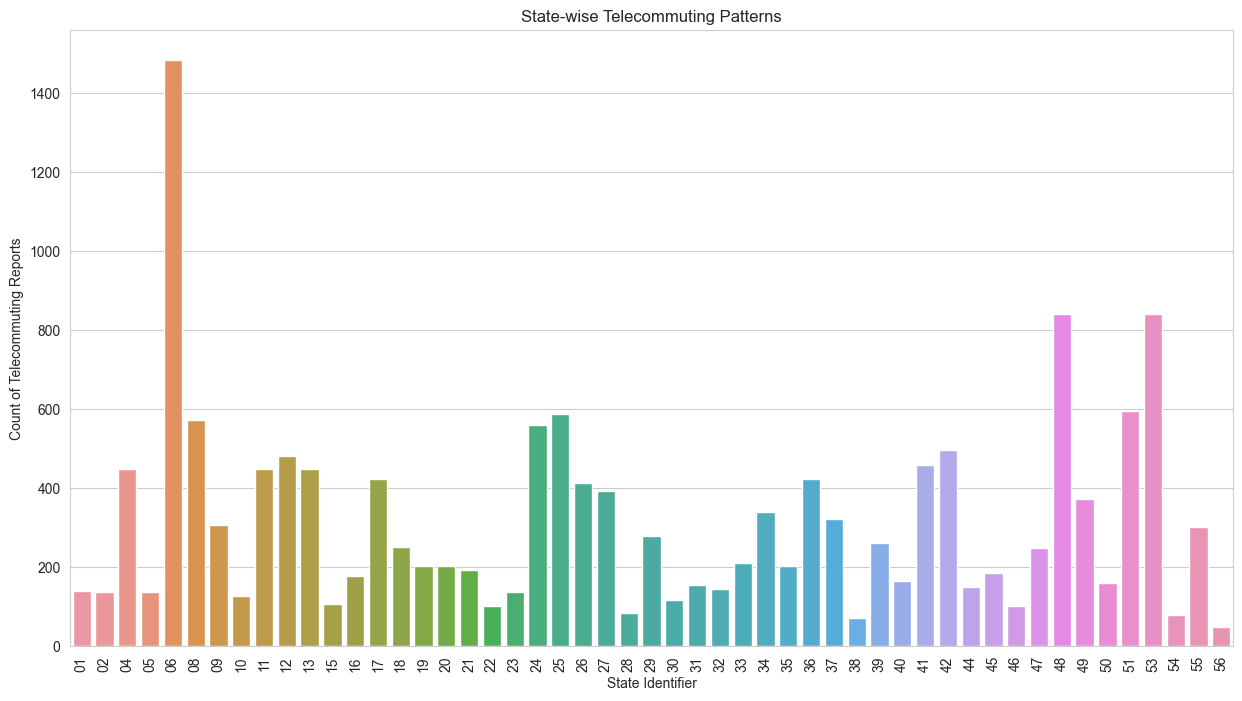

In [85]:
# State-wise Telecommuting Patterns
plt.figure(figsize=(15, 8))
state_counts = filtered_data['EST_ST'].value_counts().sort_index()
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('State-wise Telecommuting Patterns')
plt.xlabel('State Identifier')
plt.ylabel('Count of Telecommuting Reports')
plt.xticks(rotation=90)
plt.show()

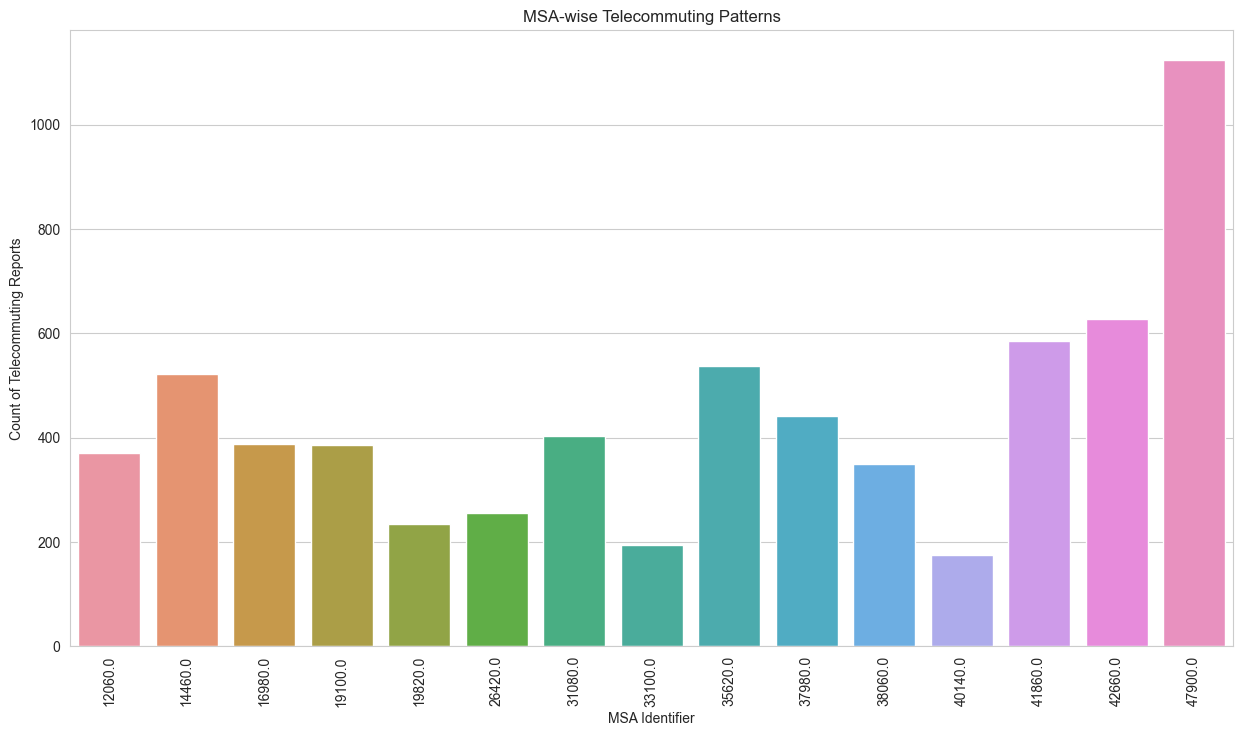

In [86]:
# Given the potentially large number of MSAs, we'll focus on the top 10 MSAs by count of telecommuting reports for clarity in visualization.

# Identifying the top 10 MSAs by count of telecommuting reports
# top_msas = filtered_data['EST_MSA'].value_counts().nlargest(10).index

# # Filtering data for top 10 MSAs
# top_msa_data = filtered_data[filtered_data['EST_MSA'].isin(top_msas)]

# # Visualizing Telecommuting by MSA
# plt.figure(figsize=(14, 8))
# sns.countplot(y='EST_MSA', hue='TWDAYS', data=top_msa_data, palette='coolwarm', order=top_msas)
# plt.title('Telecommuting by Metropolitan Statistical Area (Top 10 MSAs)')
# plt.xlabel('Count')
# plt.ylabel('MSA')
# plt.legend(title='Telework Days', labels=['1-2 Days', '3-4 Days', '5+ Days'])
# plt.tight_layout()

# plt.show()

plt.figure(figsize=(15, 8))
city_counts = filtered_data['EST_MSA'].value_counts().sort_index()
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('MSA-wise Telecommuting Patterns')
plt.xlabel('MSA Identifier')
plt.ylabel('Count of Telecommuting Reports')
plt.xticks(rotation=90)
plt.show()

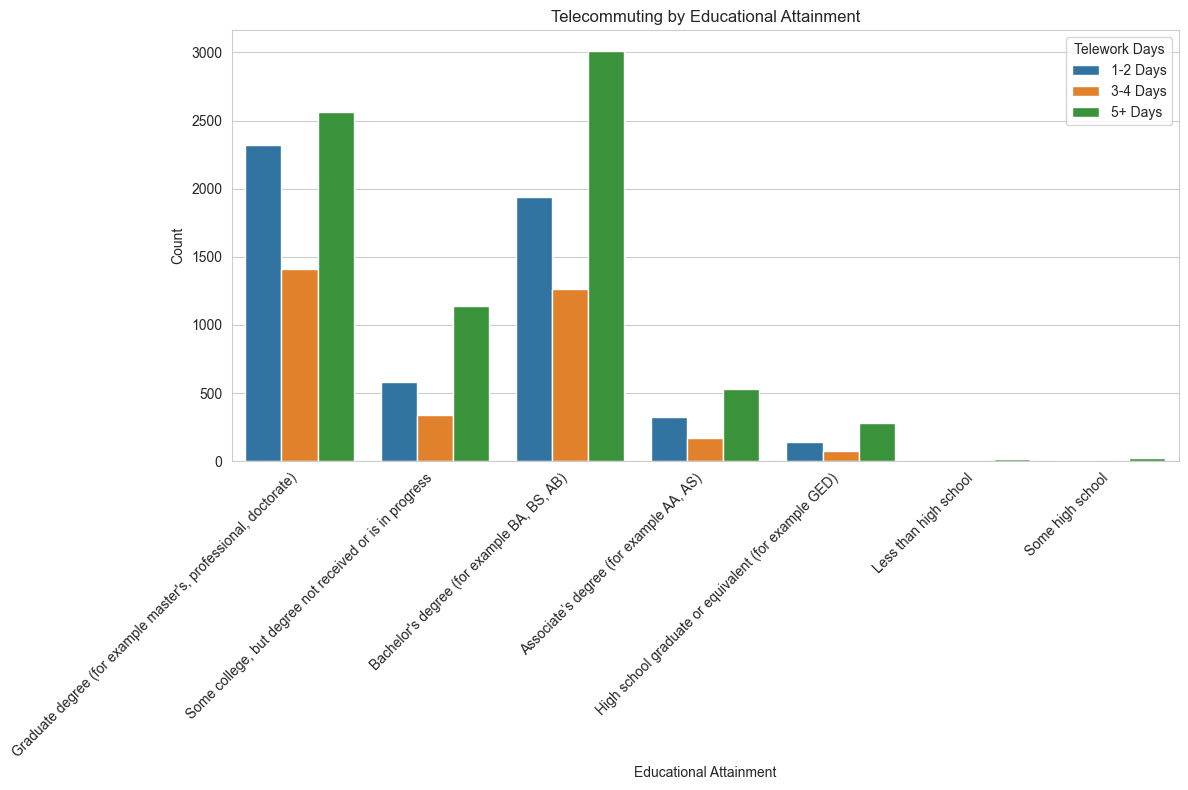

In [87]:
filtered_data = filtered_data[filtered_data['EEDUC'].isin(range(1, 8))]
education_map = {
    1: "Less than high school",
    2: "Some high school",
    3: "High school graduate or equivalent (for example GED)",
    4: "Some college, but degree not received or is in progress",
    5: "Associate’s degree (for example AA, AS)",
    6: "Bachelor's degree (for example BA, BS, AB)",
    7: "Graduate degree (for example master's, professional, doctorate)"
}
filtered_data['EEDUC'] = filtered_data['EEDUC'].map(education_map)

# Now plotting the filtered and mapped data
plt.figure(figsize=(12, 8))
sns.countplot(x='EEDUC', hue='TWDAYS_RESP', data=filtered_data)
plt.title('Telecommuting by Educational Attainment')
plt.xlabel('Educational Attainment')
plt.ylabel('Count')
plt.legend(title='Telework Days', labels=['1-2 Days', '3-4 Days', '5+ Days'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

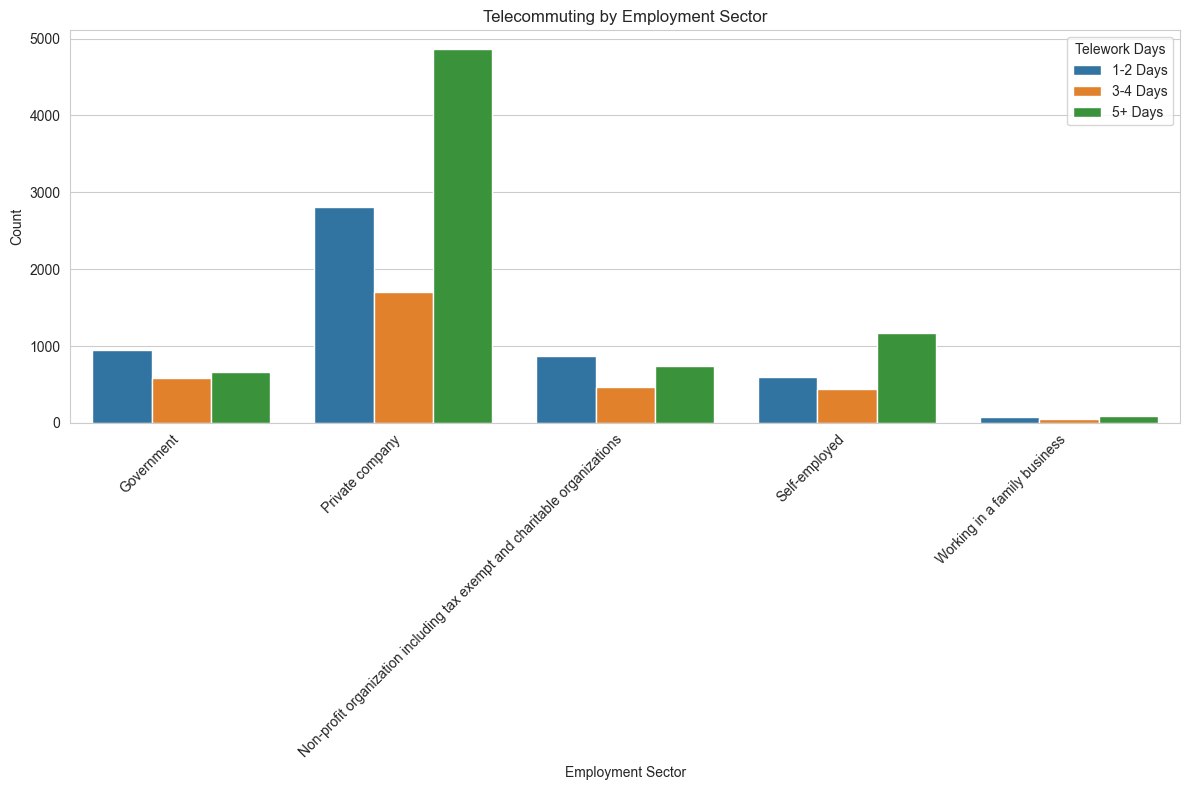

In [88]:
filtered_data = filtered_data[filtered_data['KINDWORK'].isin(range(1, 6))]

# Mapping the 'KINDWORK' codes to the text labels
work_kind_map = {
    1: "Government",
    2: "Private company",
    3: "Non-profit organization including tax exempt and charitable organizations",
    4: "Self-employed",
    5: "Working in a family business"
}
filtered_data['KINDWORK'] = filtered_data['KINDWORK'].map(work_kind_map)

# Now plotting the filtered and mapped data
plt.figure(figsize=(12, 8))
sns.countplot(x='KINDWORK', hue='TWDAYS_RESP', data=filtered_data)
plt.title('Telecommuting by Employment Sector')
plt.xlabel('Employment Sector')
plt.ylabel('Count')
plt.legend(title='Telework Days', labels=['1-2 Days', '3-4 Days', '5+ Days'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

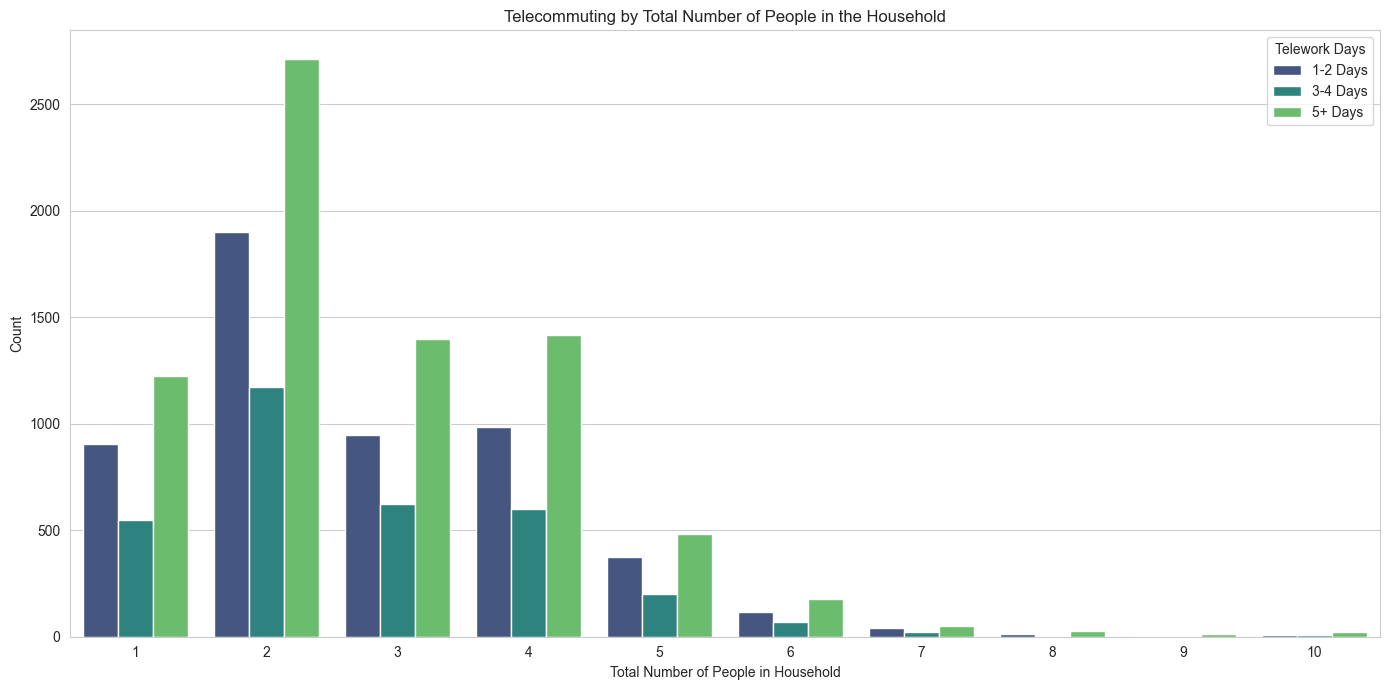

In [89]:
# Visualizing Telecommuting by Total Number of People in the Household
plt.figure(figsize=(14, 7))
sns.countplot(x='THHLD_NUMPER', hue='TWDAYS_RESP', data=filtered_data, palette='viridis')
plt.title('Telecommuting by Total Number of People in the Household')
plt.xlabel('Total Number of People in Household')
plt.ylabel('Count')
plt.legend(title='Telework Days', labels=['1-2 Days', '3-4 Days', '5+ Days'])
plt.tight_layout()

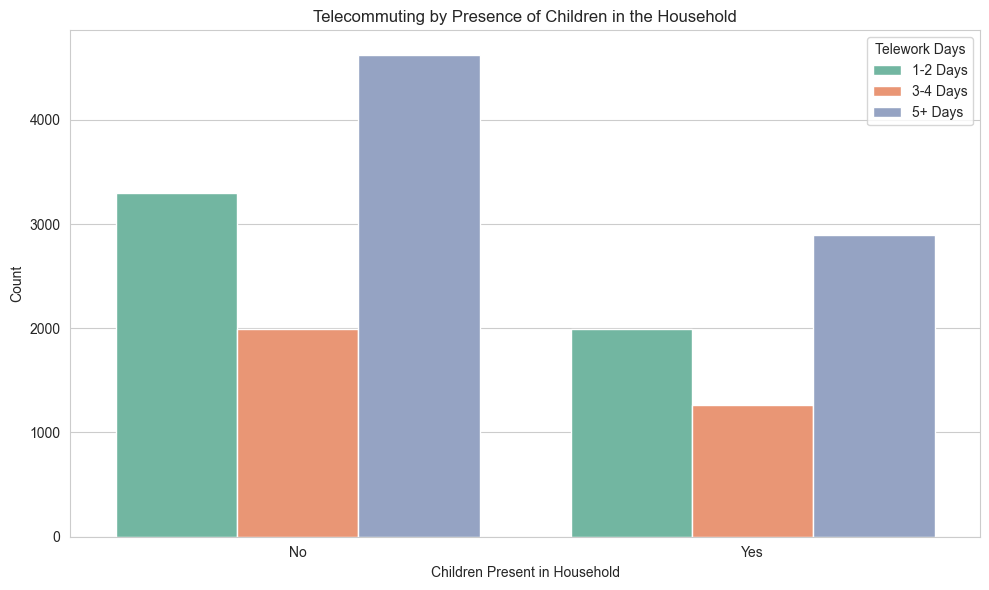

In [90]:
# Visualizing Telecommuting by Presence of Children in the Household
# For simplicity, combining children count variables into a binary presence of children in household variable
filtered_data['CHILDREN_PRESENT'] = filtered_data[['KIDS_LT5Y', 'KIDS_5_11Y', 'KIDS_12_17Y']].max(axis=1) > 0
plt.figure(figsize=(10, 6))
sns.countplot(x='CHILDREN_PRESENT', hue='TWDAYS_RESP', data=filtered_data, palette='Set2')
plt.title('Telecommuting by Presence of Children in the Household')
plt.xlabel('Children Present in Household')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Telework Days', labels=['1-2 Days', '3-4 Days', '5+ Days'])
plt.tight_layout()

plt.show()